This is just a short one, but it demonstrates what I think is a useful thing to know how to do: directly read files from Amazon's S3 using the RDKit. We'll read a compressed SD file with the compounds from ChEMBL24. I downloaded this from ChEMBL (ftp://ftp.ebi.ac.uk/pub/databases/chembl/ChEMBLdb/latest/) and copied to an S3 bucket before getting started on this blog post.

We start with the usual RDKit imports:

In [17]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

Now Amazon's boto3 and Python's built-in gzip packages:

In [ ]:
import gzip
import boto3

Start by connecting to S3, getting a file-like object pointing to the compressed SD file, and creating a gzip reader object from that:

In [14]:
s3 = boto3.resource('s3')    
obj = s3.Object('t5ix-public-chembl','chembl_24_1.sdf.gz')
fh = obj.get()['Body']
gz = gzip.GzipFile(fileobj=fh)

Use that gzip read object to construct a `ForwardSDMolSupplier`:

In [15]:
suppl = Chem.ForwardSDMolSupplier(gz)

Now read out the first 12 molecules that have <= 30 heavy atoms and display them:

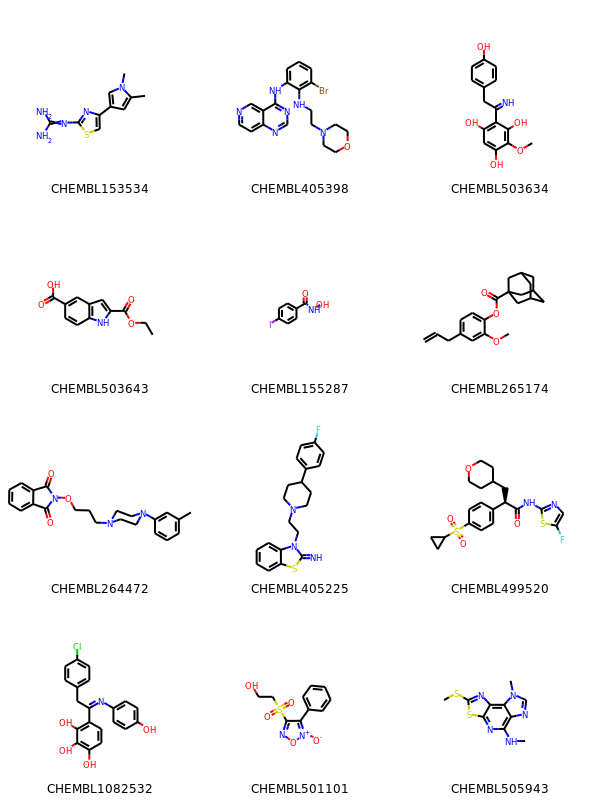

In [16]:
first12 = []
while len(first12)<12:
    m = next(suppl)
    if not m or m.GetNumAtoms()>30:
        continue
    first12.append(m)
Draw.MolsToGridImage(first12,legends=[x.GetProp('_Name') for x in first12])

That's it. We read directly from S3 without having to download and create a local copy of the >500MB SDF.